In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("hayes_roth.data")
data.head()

,name,hobby,age,education,maritalstatus,class
0,92,2,1,1,2,1
1,10,2,1,3,2,2
2,83,3,1,4,1,3
3,61,2,4,2,2,3
4,107,1,1,3,4,3


In [3]:
data.dtypes

name             int64
hobby            int64
age              int64
education        int64
maritalstatus    int64
class            int64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 6 columns):
name             132 non-null int64
hobby            132 non-null int64
age              132 non-null int64
education        132 non-null int64
maritalstatus    132 non-null int64
class            132 non-null int64
dtypes: int64(6)
memory usage: 6.3 KB


In [5]:
data.describe()

,name,hobby,age,education,maritalstatus,class
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,66.500000,2.000000,1.954545,1.954545,1.954545,1.840909
std,38.249183,0.819607,0.947988,0.947988,0.947988,0.769946
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,33.750000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,66.500000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,99.250000,3.000000,2.000000,2.000000,2.000000,2.000000
max,132.000000,3.000000,4.000000,4.000000,4.000000,3.000000


In [6]:
data.corr()

,name,hobby,age,education,maritalstatus,class
name,1.000000,0.071102,-0.174736,0.006737,-0.058947,-0.137509
hobby,0.071102,1.000000,0.078598,-0.039299,-0.039299,0.000000
age,-0.174736,0.078598,1.000000,-0.019305,-0.019305,0.418811
education,0.006737,-0.039299,-0.019305,1.000000,-0.019305,0.418811
maritalstatus,-0.058947,-0.039299,-0.019305,-0.019305,1.000000,0.418811
class,-0.137509,0.000000,0.418811,0.418811,0.418811,1.000000


In [7]:
#Checking missing values
data.isnull().sum()

name             0
hobby            0
age              0
education        0
maritalstatus    0
class            0
dtype: int64

In [8]:
#checking skewness
data.skew()

name             0.000000
hobby            0.000000
age              0.746646
education        0.746646
maritalstatus    0.746646
class            0.281827
dtype: float64

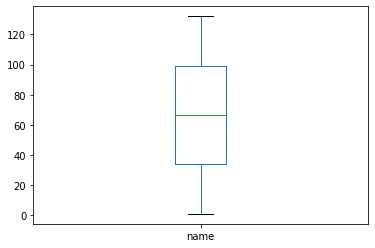

In [9]:
#Checking Outliers
data["name"].plot.box()

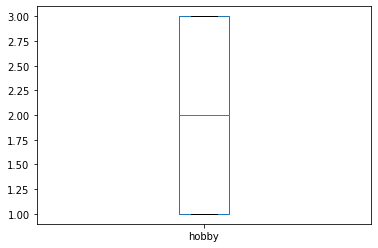

In [10]:
data['hobby'].plot.box()

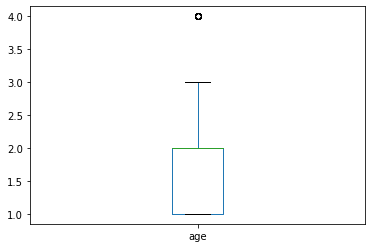

In [11]:
data['age'].plot.box()

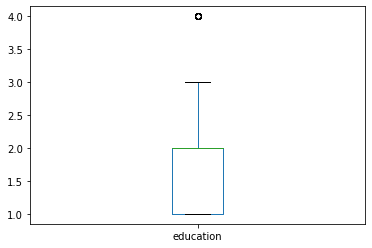

In [12]:
data['education'].plot.box()

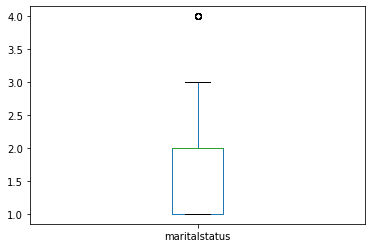

In [13]:
data["maritalstatus"].plot.box()

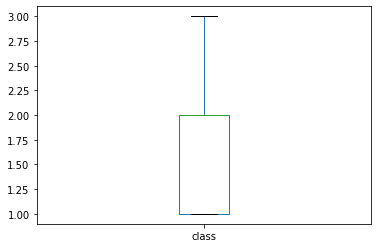

In [14]:
data['class'].plot.box()

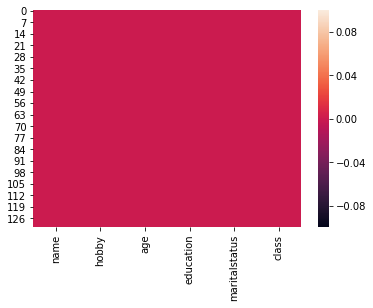

In [15]:
sns.heatmap(data.isnull())

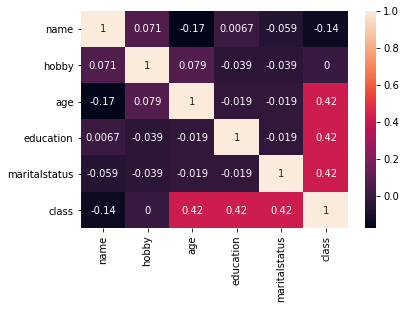

In [16]:
sns.heatmap(data.corr(),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024ECB201B38>,
      dtype=object)

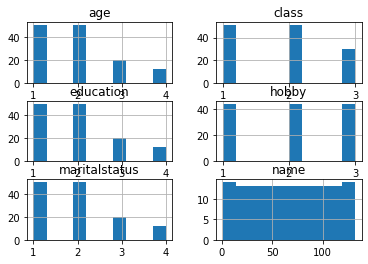

In [17]:
data.hist()

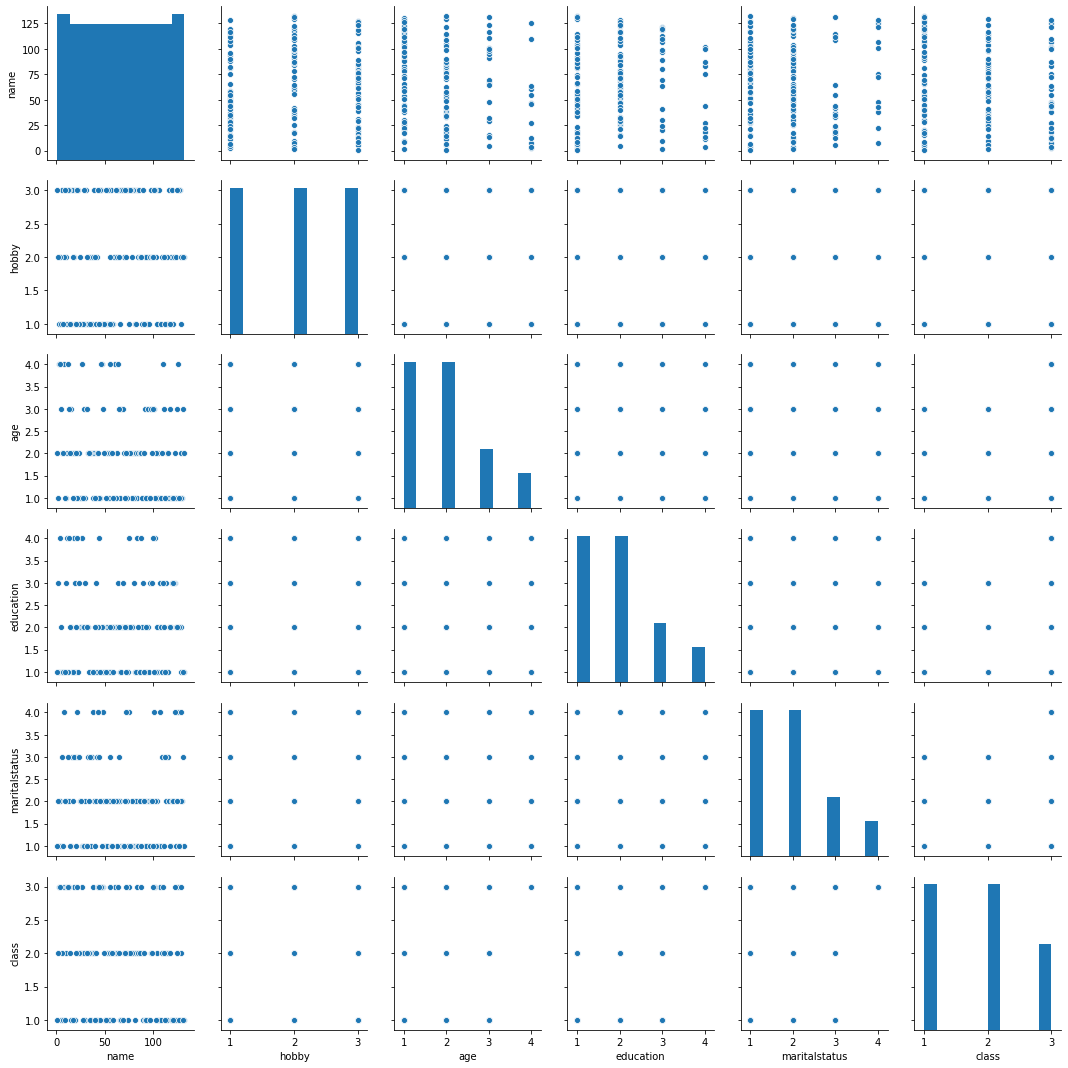

In [18]:
sns.pairplot(data)

In [19]:
#Splitting the data into train and test
x=data.drop('class',axis=1)
x.head()

,name,hobby,age,education,maritalstatus
0,92,2,1,1,2
1,10,2,1,3,2
2,83,3,1,4,1
3,61,2,4,2,2
4,107,1,1,3,4


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [30]:
y=data['class'].values
y

array([1, 2, 3, 3, 3, 2, 2, 3, 1, 1, 1, 3, 1, 2, 3, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 3, 1, 2, 1, 3, 2, 2, 2, 2, 3, 2, 2, 2, 1,
       1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 3, 2, 3, 1, 3, 1,
       2, 2, 3, 2, 3, 2, 2, 1, 3, 3, 1, 3, 1, 1, 3, 2, 1, 1, 3, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 3, 2, 2, 1, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 3, 2, 3, 1, 1, 3, 3, 1, 2, 2, 1],
      dtype=int64)

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=42)

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(104, 5)
(28, 5)
(104,)
(28,)


In [33]:
rfc=RandomForestClassifier()
print(cross_val_score(estimator=rfc, X=x_train, y=y_train, cv=5))

[0.86363636 0.86363636 0.85714286 0.8        0.73684211]


In [34]:

#Applying hyperparameters to tune the model
grid_param={
    'n_estimators': [10,100,500,1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [41]:
gscv= GridSearchCV(estimator=rfc,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

In [42]:
gscv.fit(x_train,y_train)
best_parameters=gscv.best_params_
print(best_parameters)

{'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 100}


In [43]:
best_score=gscv.best_score_
print(best_score)

0.8557692307692307


In [28]:
#save the model
from sklearn.externals import joblib
joblib.dump(rfc,"Project24.pkl")

['Project24.pkl']